## Contouring and colormaps 

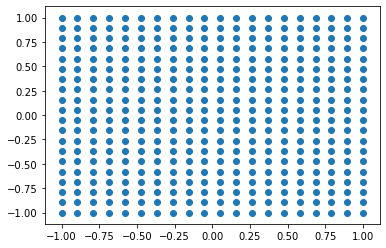

In [19]:
#Setup cell for creating data used in cells below.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math

# Create a meshgrid with origin (-1,-1) with grid spacing of 2/N
N = 20  #N=20 gives a spacing of 0.1
x,y = np.meshgrid(np.linspace(-1,1,N),np.linspace(-1,1,N))

#Show the mesh grid
plt.scatter(x,y);

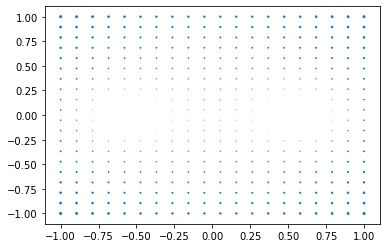

In [23]:
#define a function for generating data value at each grid point
def ovals_of_cassini(x,y,a=.59,b=.5):
    return (x**2 + y**2 + a**2)**2 - 4 * a**2 * x**2 - b**4

#create the data values for the grid
d = ovals_of_cassini(x,y)

#Show the mesh grid with data values
plt.scatter(x,y,d);

<a list of 14 text.Text objects>

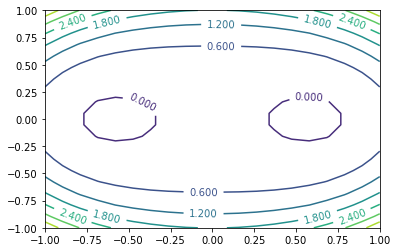

In [12]:
#First a simple contour plot
cp = plt.contour(x, y, d)

#Add countour line labels and show gridpoints
plt.clabel(cp, inline=True, fontsize=10)

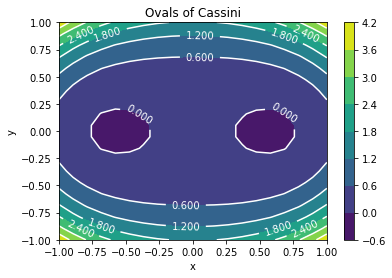

In [45]:
#filled contour plot with colorbar
cp = plt.contourf(x, y, d)
plt.colorbar(cp)
clines = plt.contour(x, y, d, colors=["w"])
plt.clabel(clines, inline=True, fontsize=10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ovals of Cassini")
plt.show()


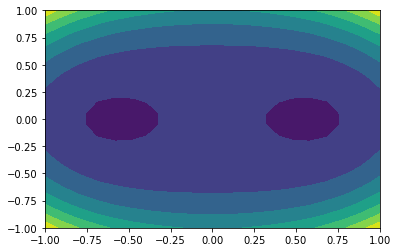

In [5]:
#filled contour plot with contour lines and colorbar
cp = plt.contourf(x, y, d)

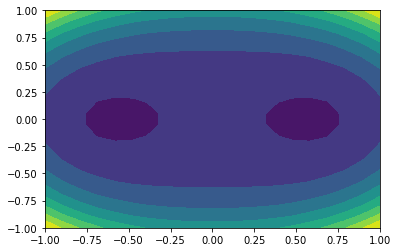

In [6]:
#filled contour plot with user defined contour intervals
intervals = np.arange(-0.5,4.5,.5)
cp = plt.contourf(x, y, d, intervals)


### Colormaps

https://matplotlib.org/tutorials/colors/colormap-manipulation.html

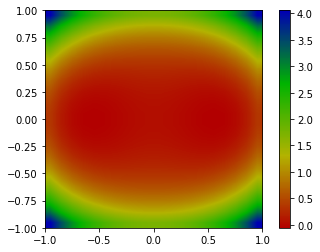

In [46]:
#Using a custom color map created from a color list using red, yellow, green
#The color list can be much longer and structured with sub lists
colors = [(.7,0,0),(.7, .7, 0),(0, .7, 0),(0,0,.7)]
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('MyMap',colors,256)

#Using a provided continuous colormap with contour lines
#https://matplotlib.org/tutorials/colors/colormaps.html
#cmap=cm.plasma

im = plt.imshow(d, interpolation='bilinear', origin='lower', cmap=cmap,extent=(-1,1,-1,1))
plt.colorbar(im)

#add contour lines with labels and a color bar

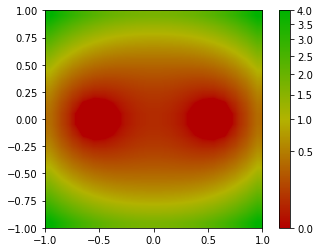

In [48]:
#Note how red dominates the previous image, in some cases a non-linear normalization 
#  may be preferable.  See references below for color maps 
# https://matplotlib.org/tutorials/colors/colormapnorms.html
# https://medium.com/@Vincentropy/a-practical-intro-to-colors-in-python-496737f23568
colors = [(.7,0,0),(.7, .7, 0),(0, .7, 0)]
from matplotlib.colors import LinearSegmentedColormap, Normalize, PowerNorm
cmap = LinearSegmentedColormap.from_list('MyMap',colors,256)
norm = PowerNorm(.5, vmin=0,vmax=4.0)


im = plt.imshow(d, interpolation='bilinear', origin='lower', cmap=cmap, norm=norm, extent=(-1,1,-1,1))
plt.colorbar(im)

#add contour lines and color bar

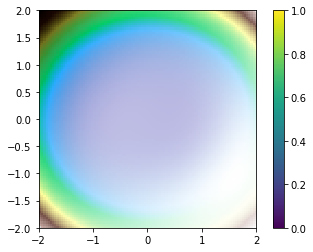

In [49]:
#This last example uses a lightsource

from matplotlib.colors import LightSource
# Create a meshgrid with origin (-2,-2) with grid spacing of 4/N
N = 100
x,y = np.meshgrid(np.linspace(-2,2,N),np.linspace(-2,2,N))
a=.6
b=.5
d = (x**2 + y**2 + a**2)**2 - 4 * a**2 * x**2 - b**4

#specify the location of the light source, try different locations
ls = LightSource(azdeg=310, altdeg=60)  
cmap=cm.terrain
im = plt.imshow(ls.shade(d, cmap=cmap, vert_exag=.5, blend_mode='hsv'),extent=(-2,2,-2,2))
plt.colorbar(im)

# Use a proxy artist for the colorbar..
# im2 = plt.imshow(d, cmap=cmap,extent=(-2,2,-2,2))
# im2.remove()
# plt.colorbar(im2)
